In [67]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from joblib import dump, load

In [68]:
SGA = Table.read("/global/homes/b/barnerg/DESI_SGA/Morphology/SGA_morph.fits")

In [4]:
SGA

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,z50,g50,C_r50_r90,C_r20_r90,m(r50),m(z50),m(g50),Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
284583,SGA-2020 284583,PGC1753576,1753576,246.63893700000006,25.882395000000002,E,83.58,0.4168694,0.61659503,0.049369153,23.009481,16.281,False,LEDA-20181114,102768,2MASXJ16263037+2552589_GROUP,3,False,246.63132430980986,25.886678155342814,0.92581606,2465p260,246.63899443421053,25.88239593752038,1.0317777,SB26,89.25743,0.7660097,246.63894134159338,25.882421271706928,21.809486,7.683644,7.267518,6.908575,6.584644,8.19172,10.043491,12.2072115,14.66538,17.695236,21.416355,25.87598,30.953333,16.50979,15.567412,14.869183,16.380758,15.444356,14.747147,16.275633,15.342991,14.648945,16.190153,15.260059,14.5695095,16.121006,15.193452,14.5059595,16.06036,15.134916,14.4499445,16.00693,15.085361,14.402035,15.962352,15.040784,14.35771,15.920147,15.0014,14.320146,0.030591438,0.04308892,0.045999907,0.04829483,0.06055945,0.080751404,0.0973,0.124484144,0.20583051,0.01532438,0.015401917,0.015267819,0.013852132,0.013975341,0.01385223,0.012736728,0.012889164,0.012807729,0.0118285,0.011991284,0.011952993,0.011088653,0.011258294,0.011255878,0.01050395,0.010681791,0.010707616,0.010012423,0.010216223,0.010258886,0.009653168,0.009853663,0.009897824,0.0092963725,0.009511294,0.009575142,15.662999,7318.958,8.404456e-05,0.7656309,0.11777708,14.75623

In [69]:
SGA.remove_rows([range(138026,383620)])

/global/common/software/desi/perlmutter/desiconda/20230111-2.1.0/conda/lib/python3.10/site-packages/astropy/table/table.py:2750: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [70]:
SGA.sort('SGA_ID')

In [71]:
start_index = 1  # Start index (inclusive)
end_index = 123  # End index (exclusive)
SGA.remove_columns(SGA.colnames[start_index:end_index])

In [72]:
start_index = 4  # Start index (inclusive)
end_index = 9  # End index (exclusive)
SGA.remove_columns(SGA.colnames[start_index:end_index])

In [73]:
start_index = 6  # Start index (inclusive)
end_index = 9  # End index (exclusive)
SGA.remove_columns(SGA.colnames[start_index:end_index])

In [74]:
start_index = 0  # Start index (inclusive)
end_index = 1  # End index (exclusive)
SGA.remove_columns(SGA.colnames[start_index:end_index])

In [75]:
SGA

g_r,r_z,g_z,C_r50_r90,C_r20_r90,Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
float32,float32,float32,float64,float64,float64,float64,float64,float64
0.59065247,0.45973682,1.0503893,0.4020130617027366,0.21711269027456045,0.015480943327151664,0.0013769916708179508,-0.014103951656333713,5.0
1.015461,0.79856396,1.8140249,0.3623396013552913,0.176289530283184,0.017329178104262155,0.015393382981958581,-0.001935795122303574,4.0
0.9283848,0.4878435,1.4162283,0.2435126782700119,0.056979679384652024,-0.003679450884209512,0.10415140435072878,0.1078308552349383,-5.0
0.5707226,0.4102068,0.9809294,0.4801722352399934,0.32037107318891567,0.01205554658611696,0.024965678960955362,0.012910132374838401,4.0
0.8098583,0.5967703,1.4066286,0.47354910224180186,0.19540769643692305,0.009817697665478242,0.03339944809394968,0.023581750428471437,5.0
0.5699291,0.23768997,0.8076191,0.4805568275691704,0.2385504021259808,0.0010985971780139714,0.044299523752950876,0.043200926574936904,5.0
--,--,--,--,--,--,--,--,-5.0
0.787817,0.5611172,1.3489342,0.5036384248338298,0.26724862532262184,0.004761508987359608,0.004927267937866464,0.00016575895050685574,5.0
0.85205936,0.6315727,1.4836321,0.23950436489785912,0.07845698906821677,0.06496355163550582,0.06307250897168304,-0.001891042663822784,-5.0


In [76]:
mask = np.logical_not(SGA['g_r'].mask )& np.logical_not(SGA['r_z'].mask)& np.logical_not(SGA['g_z'].mask)& np.logical_not(SGA['C_r50_r90'].mask)& np.logical_not(SGA['C_r20_r90'].mask)& np.logical_not(SGA['Delta(g_r)'].mask)& np.logical_not(SGA['Delta(g_z)'].mask)& np.logical_not(SGA['Delta(r_z)'].mask)& np.logical_not(SGA['HUBBLE_TYPE'].mask)
SGAnew = SGA[mask]

In [77]:
SGAnew

g_r,r_z,g_z,C_r50_r90,C_r20_r90,Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
float32,float32,float32,float64,float64,float64,float64,float64,float64
0.59065247,0.45973682,1.0503893,0.4020130617027366,0.21711269027456045,0.015480943327151664,0.0013769916708179508,-0.014103951656333713,5.0
1.015461,0.79856396,1.8140249,0.3623396013552913,0.176289530283184,0.017329178104262155,0.015393382981958581,-0.001935795122303574,4.0
0.9283848,0.4878435,1.4162283,0.2435126782700119,0.056979679384652024,-0.003679450884209512,0.10415140435072878,0.1078308552349383,-5.0
0.5707226,0.4102068,0.9809294,0.4801722352399934,0.32037107318891567,0.01205554658611696,0.024965678960955362,0.012910132374838401,4.0
0.8098583,0.5967703,1.4066286,0.47354910224180186,0.19540769643692305,0.009817697665478242,0.03339944809394968,0.023581750428471437,5.0
0.5699291,0.23768997,0.8076191,0.4805568275691704,0.2385504021259808,0.0010985971780139714,0.044299523752950876,0.043200926574936904,5.0
0.787817,0.5611172,1.3489342,0.5036384248338298,0.26724862532262184,0.004761508987359608,0.004927267937866464,0.00016575895050685574,5.0
0.85205936,0.6315727,1.4836321,0.23950436489785912,0.07845698906821677,0.06496355163550582,0.06307250897168304,-0.001891042663822784,-5.0
0.99376106,0.7038336,1.6975946,0.22715787107924473,0.04269013834663925,0.09522596931332528,-0.03617446748065278,-0.13140043679397806,3.0


In [78]:
print(np.unique(SGAnew['HUBBLE_TYPE']))

HUBBLE_TYPE
-----------
       -5.0
       -2.0
        0.0
        1.0
        2.0
        3.0
        4.0
        5.0
        6.0
        7.0
        9.0


In [79]:
SGAnew['Morph'] = 'Default'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == -5.0]= 'Eliptical'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == -2.0]= 'Lenticular'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 0.0]= 'Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 1.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 2.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 3.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 4.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 5.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 6.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 7.0] ='Spiral'
SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 9.0]= 'Irregular'

/tmp/ipykernel_1019267/4264810245.py:2: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == -5.0]= 'Eliptical'
/tmp/ipykernel_1019267/4264810245.py:3: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == -2.0]= 'Lenticular'
/tmp/ipykernel_1019267/4264810245.py:12: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  SGAnew['Morph'][SGAnew['HUBBLE_TYPE'] == 9.0]= 'Irregular'


In [80]:
SGAnew

g_r,r_z,g_z,C_r50_r90,C_r20_r90,Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE,Morph
float32,float32,float32,float64,float64,float64,float64,float64,float64,str7
0.59065247,0.45973682,1.0503893,0.4020130617027366,0.21711269027456045,0.015480943327151664,0.0013769916708179508,-0.014103951656333713,5.0,Spiral
1.015461,0.79856396,1.8140249,0.3623396013552913,0.176289530283184,0.017329178104262155,0.015393382981958581,-0.001935795122303574,4.0,Spiral
0.9283848,0.4878435,1.4162283,0.2435126782700119,0.056979679384652024,-0.003679450884209512,0.10415140435072878,0.1078308552349383,-5.0,Eliptic
0.5707226,0.4102068,0.9809294,0.4801722352399934,0.32037107318891567,0.01205554658611696,0.024965678960955362,0.012910132374838401,4.0,Spiral
0.8098583,0.5967703,1.4066286,0.47354910224180186,0.19540769643692305,0.009817697665478242,0.03339944809394968,0.023581750428471437,5.0,Spiral
0.5699291,0.23768997,0.8076191,0.4805568275691704,0.2385504021259808,0.0010985971780139714,0.044299523752950876,0.043200926574936904,5.0,Spiral
0.787817,0.5611172,1.3489342,0.5036384248338298,0.26724862532262184,0.004761508987359608,0.004927267937866464,0.00016575895050685574,5.0,Spiral
0.85205936,0.6315727,1.4836321,0.23950436489785912,0.07845698906821677,0.06496355163550582,0.06307250897168304,-0.001891042663822784,-5.0,Eliptic
0.99376106,0.7038336,1.6975946,0.22715787107924473,0.04269013834663925,0.09522596931332528,-0.03617446748065278,-0.13140043679397806,3.0,Spiral


In [81]:
SGAnew.sort(['Morph'])
SGAnew

g_r,r_z,g_z,C_r50_r90,C_r20_r90,Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE,Morph
float32,float32,float32,float64,float64,float64,float64,float64,float64,str7
0.93008804,0.72756386,1.6576519,0.21628213222097184,0.035337506127780034,0.011020788858490782,0.0067559863156438915,-0.0042648025428468905,-5.0,Eliptic
0.8813057,0.67679787,1.5581036,0.20099511342674994,0.03285610595684327,0.002247841189803257,0.010474270795715501,0.008226429605912244,-5.0,Eliptic
0.89865875,0.4643097,1.3629684,0.13371916954212443,0.03732054753937308,0.06144231615341367,0.3521983580697867,0.29075604191637305,-5.0,Eliptic
0.9072561,0.622694,1.5299501,0.17853610991317911,0.02148356401868768,0.005067116812052852,0.024066140841133343,0.01899902402908049,-5.0,Eliptic
0.9236326,0.69071865,1.6143513,0.2024655674635397,0.05079160217047407,0.018921333863425538,0.029968451405931074,0.011047117542505536,-5.0,Eliptic
0.7720566,0.56054974,1.3326063,0.11173875959223248,0.041581032042372616,0.20850561486231145,0.2937358837934867,0.08523026893117525,-5.0,Eliptic
0.92003345,0.642293,1.5623264,0.3548008168956411,0.10029990527431573,0.0008877495273686975,0.009158168231354402,0.008270418703985705,-5.0,Eliptic
0.8405514,0.60775185,1.4483032,0.3288506376511107,0.07902656194046268,-0.005610616694798232,-0.006172164411492709,-0.0005615477166944771,-5.0,Eliptic
0.8911867,0.6547842,1.5459709,0.19473276001953774,0.02494019639371196,-0.0003898080479096677,0.014990277919107786,0.015380085967017454,-5.0,Eliptic


In [82]:
N = len(SGAnew)

X = np.zeros((N,8)) # or (8,N), depending on what shape your array needs to be

# Copy each column over
X[:,0] = SGAnew['g_r']
X[:,1] = SGAnew['g_z']
X[:,2]= SGAnew['r_z']
X[:,3]= SGAnew['C_r50_r90']
X[:,4]= SGAnew['C_r20_r90']
X[:,5]= SGAnew['Delta(g_r)']
X[:,6]= SGAnew['Delta(g_z)']
X[:,7]= SGAnew['Delta(r_z)']

In [83]:
y = np.array(SGAnew['Morph'])
            

In [84]:
y = y.ravel()

In [85]:
row = SGAnew[44001]
print(row)

   g_r        r_z       g_z         C_r50_r90           C_r20_r90           Delta(g_r)           Delta(g_z)          Delta(r_z)      HUBBLE_TYPE  Morph 
---------- ---------- -------- ------------------- ------------------- -------------------- ------------------- -------------------- ----------- -------
0.93228054 0.69523144 1.627512 0.24000216407981953 0.08765540803633777 0.028597564426000588 0.04046349380805214 0.011865929382051554        -2.0 Lenticu


In [86]:
y = y[44000:]
X = X[44000:]

In [87]:
unique , counts = np.unique(y, return_counts = True)
print(unique, counts)

['Lenticu' 'Spiral'] [ 4269 81664]


In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(max_depth=40,n_estimators=100, random_state=42)

# Train the classifier
clf = rf_classifier.fit(X_train, y_train)

In [90]:
print(len(y_test))

17187


In [91]:
unique , counts = np.unique(y_test, return_counts = True)
print(unique, counts)

['Lenticu' 'Spiral'] [  841 16346]


In [50]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

     Lenticu       0.49      0.03      0.06       841
      Spiral       0.95      1.00      0.97     16346

    accuracy                           0.95     17187
   macro avg       0.72      0.52      0.52     17187
weighted avg       0.93      0.95      0.93     17187



In [51]:
'''confusion_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix")
print(confusion_matrix)'''

'confusion_matrix = confusion_matrix(y_test, y_pred)\nprint("confusion_matrix")\nprint(confusion_matrix)'

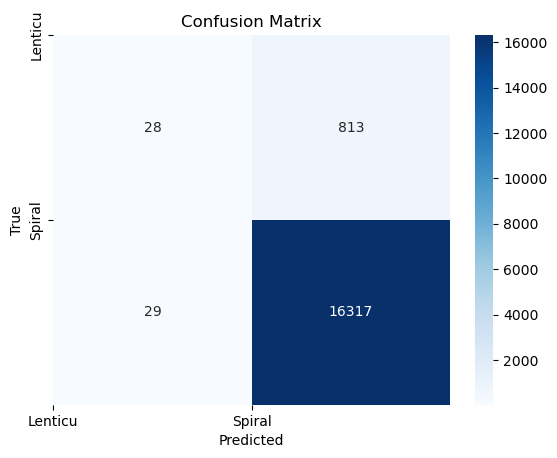

In [103]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))


plt.savefig('ConfusionSvL.png',dpi=300)
plt.show()

In [99]:
spiral_frac = 16317/16346
print('spiral_frac =', spiral_frac)
print('len_frac =', 28/841)

spiral_frac = 0.9982258656552062
len_frac = 0.03329369797859691


In [100]:
y_true = y_test
accuracy = accuracy_score(y_true, y_pred)
print('Fraction of correctly classified samples =', accuracy)
#the fraction of correctly classified samples

Fraction of correctly classified samples = 0.9510094839122593


In [101]:
accuracy = accuracy_score(y_true, y_pred,normalize=False)
print('Number of correctly classified samples =', accuracy)

Number of correctly classified samples = 16345


In [102]:
dump(clf, 'Trial1.joblib')

['Trial1.joblib']

In [56]:
clf = load('Trial1.joblib') 